In [52]:
#Accessing file from google drive as the assignment is done in Google colab
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path= '/content/drive/MyDrive/seeds.data'
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            ' groove.']
df = pd.read_csv(path,header=None,names=features + ['target'])
display(df)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove.,target
0,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
1,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
...,...,...,...,...,...,...,...,...
206,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,3
207,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,3
208,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3
209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [54]:
# Creating Feature array and target array
X = df.iloc[1:, [1,2]].values
X=X.astype('float64')
#print(X)
y = df.loc[1:,'target']
y=y.astype('int64')
#print (y)
print('Class labels:', np.unique(y))

Class labels: [1 2 3]


In [55]:
# Splitting dataset in 30% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [56]:
print('Labels counts in y:', np.bincount(y)[1:])
>>> print('Labels counts in y_train:', np.bincount(y_train)[1:])
>>> print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [49 49 49]
Labels counts in y_test: [21 21 21]


In [58]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [59]:
# Plotting decision Boundary
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # X = X.to_numpy()
    # y = y.to_numpy()
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

predicted: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 3 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 1 3 1 3 2 2 3 2 3 2 3 1 3 2 1 3 2 3 3 2 3 1 1 3 1]
true class: [3 2 2 2 2 2 1 3 3 2 1 3 2 3 1 1 3 1 3 1 1 1 1 3 2 2 1 2 3 1 1 2 2 1 2 3 3
 3 2 1 1 3 2 1 3 2 1 2 3 1 3 1 1 3 2 3 3 2 3 2 1 3 2]


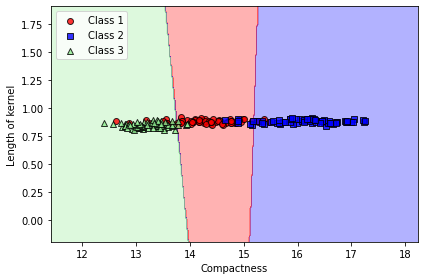

In [60]:
# Building Logistic Regression for Binary Classifier
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_pred= logistic_reg.predict(X_test)
print('predicted:',y_pred)
print('true class:', np.array(y_test))
plot_decision_regions(X, y, classifier=logistic_reg)
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 8


In [62]:
from sklearn.metrics import accuracy_score
>>> print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.873
